# 1. IMPORTATION DES BIBLIOTHÈQUES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 2. CHARGEMENT DES DONNÉES

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Devoir ML/heart.csv")

print("=" * 80)
print("APERÇU DES DONNÉES")
print("=" * 80)
print(f"\nDimensions du dataset : {df.shape}")
print(f"Nombre de patients : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")

print("\n--- Premières lignes ---")
print(df.head())

print("\n--- Informations sur les variables ---")
print(df.info())

print("\n--- Statistiques descriptives ---")
print(df.describe())

print("\n--- Distribution de la variable cible ---")
print(df['HeartDisease'].value_counts())
print(f"\nProportion de malades : {df['HeartDisease'].mean():.2%}")

APERÇU DES DONNÉES

Dimensions du dataset : (918, 12)
Nombre de patients : 918
Nombre de variables : 12

--- Premières lignes ---
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

--- Informations sur les variables ---
<class 'pandas.core.frame.DataFrame'>

# 3. EXPLORATION DES DONNÉES

In [3]:
print("\n" + "=" * 80)
print("ANALYSE EXPLORATOIRE")
print("=" * 80)

# Vérification des valeurs manquantes
print("\n--- Valeurs manquantes ---")
print(df.isnull().sum())


ANALYSE EXPLORATOIRE

--- Valeurs manquantes ---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Visualisation 1 : Distribution de la variable cible

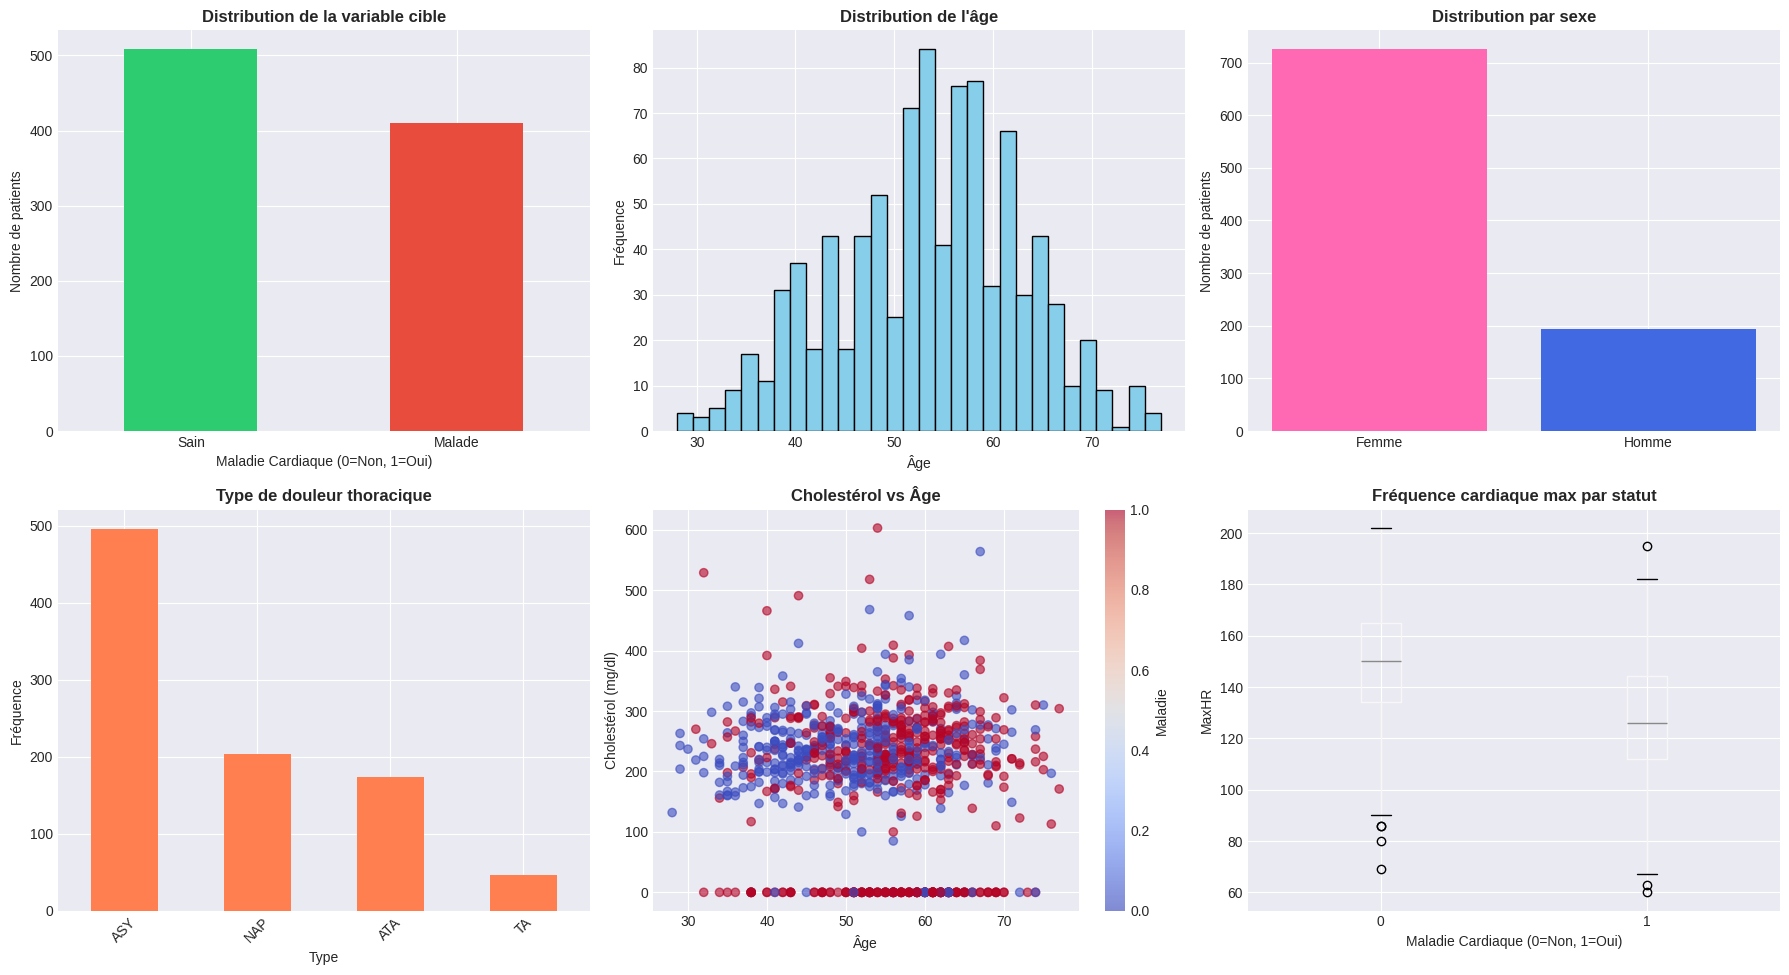

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('ANALYSE EXPLORATOIRE DES DONNÉES', fontsize=16, fontweight='bold')

# Distribution de HeartDisease
ax = axes[0, 0]
df['HeartDisease'].value_counts().plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
ax.set_title('Distribution de la variable cible', fontweight='bold')
ax.set_xlabel('Maladie Cardiaque (0=Non, 1=Oui)')
ax.set_ylabel('Nombre de patients')
ax.set_xticklabels(['Sain', 'Malade'], rotation=0)

# Distribution de l'âge
ax = axes[0, 1]
df['Age'].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
ax.set_title('Distribution de l\'âge', fontweight='bold')
ax.set_xlabel('Âge')
ax.set_ylabel('Fréquence')

# Distribution par sexe
ax = axes[0, 2]
sex_counts = df['Sex'].value_counts()
ax.bar(['Femme', 'Homme'], sex_counts.values, color=['#ff69b4', '#4169e1'])
ax.set_title('Distribution par sexe', fontweight='bold')
ax.set_ylabel('Nombre de patients')

# Type de douleur thoracique
ax = axes[1, 0]
df['ChestPainType'].value_counts().plot(kind='bar', ax=ax, color='coral')
ax.set_title('Type de douleur thoracique', fontweight='bold')
ax.set_xlabel('Type')
ax.set_ylabel('Fréquence')
ax.tick_params(axis='x', rotation=45)

# Cholestérol vs Âge
ax = axes[1, 1]
scatter = ax.scatter(df['Age'], df['Cholesterol'], c=df['HeartDisease'],
                     cmap='coolwarm', alpha=0.6)
ax.set_title('Cholestérol vs Âge', fontweight='bold')
ax.set_xlabel('Âge')
ax.set_ylabel('Cholestérol (mg/dl)')
plt.colorbar(scatter, ax=ax, label='Maladie')

# Fréquence cardiaque max
ax = axes[1, 2]
df.boxplot(column='MaxHR', by='HeartDisease', ax=ax)
ax.set_title('Fréquence cardiaque max par statut', fontweight='bold')
ax.set_xlabel('Maladie Cardiaque (0=Non, 1=Oui)')
ax.set_ylabel('MaxHR')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Matrice de corrélation


--- Matrice de corrélation ---


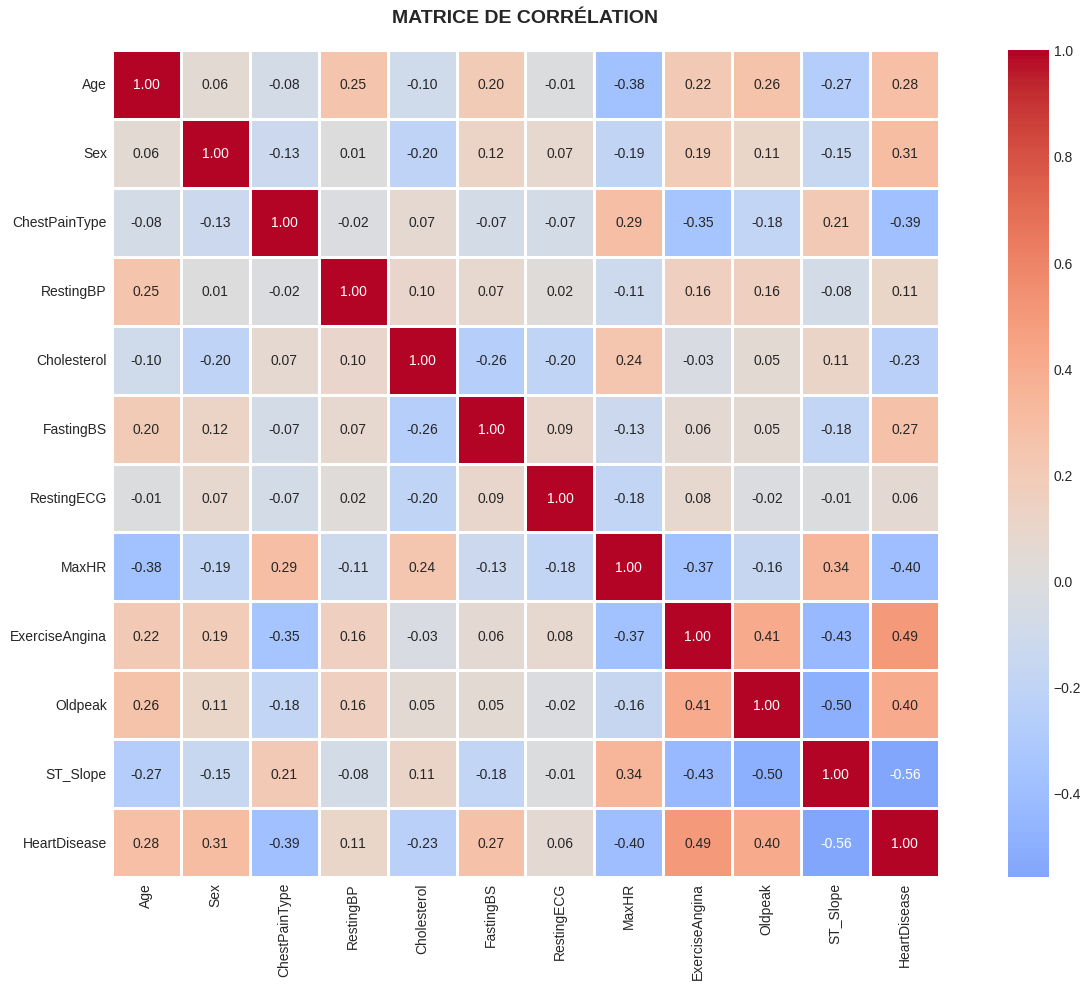


Corrélation avec HeartDisease :
HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


In [5]:
print("\n--- Matrice de corrélation ---")
plt.figure(figsize=(14, 10))
# Encodage temporaire pour la corrélation
df_corr = df.copy()
le = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

correlation = df_corr.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('MATRICE DE CORRÉLATION', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrélation avec HeartDisease :")
print(correlation['HeartDisease'].sort_values(ascending=False))

# 4. PRÉTRAITEMENT DES DONNÉES

In [6]:
print("\n" + "=" * 80)
print("PRÉTRAITEMENT DES DONNÉES")
print("=" * 80)

# Copie du dataframe
df_processed = df.copy()

# Encodage des variables catégorielles
print("\n--- Encodage des variables catégorielles ---")
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Séparation features et target
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

print(f"\nShape de X : {X.shape}")
print(f"Shape de y : {y.shape}")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTaille du jeu d'entraînement : {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Taille du jeu de test : {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# Standardisation
print("\n--- Standardisation des variables numériques ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Standardisation effectuée")


PRÉTRAITEMENT DES DONNÉES

--- Encodage des variables catégorielles ---
Sex: {'F': np.int64(0), 'M': np.int64(1)}
ChestPainType: {'ASY': np.int64(0), 'ATA': np.int64(1), 'NAP': np.int64(2), 'TA': np.int64(3)}
RestingECG: {'LVH': np.int64(0), 'Normal': np.int64(1), 'ST': np.int64(2)}
ExerciseAngina: {'N': np.int64(0), 'Y': np.int64(1)}
ST_Slope: {'Down': np.int64(0), 'Flat': np.int64(1), 'Up': np.int64(2)}

Shape de X : (918, 11)
Shape de y : (918,)

Taille du jeu d'entraînement : 734 (80.0%)
Taille du jeu de test : 184 (20.0%)

--- Standardisation des variables numériques ---
✓ Standardisation effectuée


# 5. CONSTRUCTION ET ENTRAÎNEMENT DES MODÈLES

In [7]:
print("\n" + "=" * 80)
print("ENTRAÎNEMENT DES MODÈLES")
print("=" * 80)

# Dictionnaire des modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}


ENTRAÎNEMENT DES MODÈLES


# Entraînement et évaluation

In [8]:
results = {}
predictions = {}

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Entraînement
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    predictions[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc_auc:.4f}")

    # Validation croisée
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"CV Score  : {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


--- Random Forest ---
Accuracy  : 0.8750
Precision : 0.8762
Recall    : 0.9020
F1-Score  : 0.8889
ROC-AUC   : 0.9229
CV Score  : 0.8515 (+/- 0.0198)

--- KNN ---
Accuracy  : 0.8913
Precision : 0.8942
Recall    : 0.9118
F1-Score  : 0.9029
ROC-AUC   : 0.9192
CV Score  : 0.8447 (+/- 0.0161)

--- SVM ---
Accuracy  : 0.8859
Precision : 0.8649
Recall    : 0.9412
F1-Score  : 0.9014
ROC-AUC   : 0.9286
CV Score  : 0.8596 (+/- 0.0289)


# 6. VISUALISATION DES RÉSULTATS


VISUALISATION DES RÉSULTATS

--- TABLEAU COMPARATIF DES PERFORMANCES ---
               Accuracy  Precision    Recall  F1-Score   ROC-AUC
Random Forest  0.875000   0.876190  0.901961  0.888889  0.922884
KNN            0.891304   0.894231  0.911765  0.902913  0.919237
SVM            0.885870   0.864865  0.941176  0.901408  0.928623


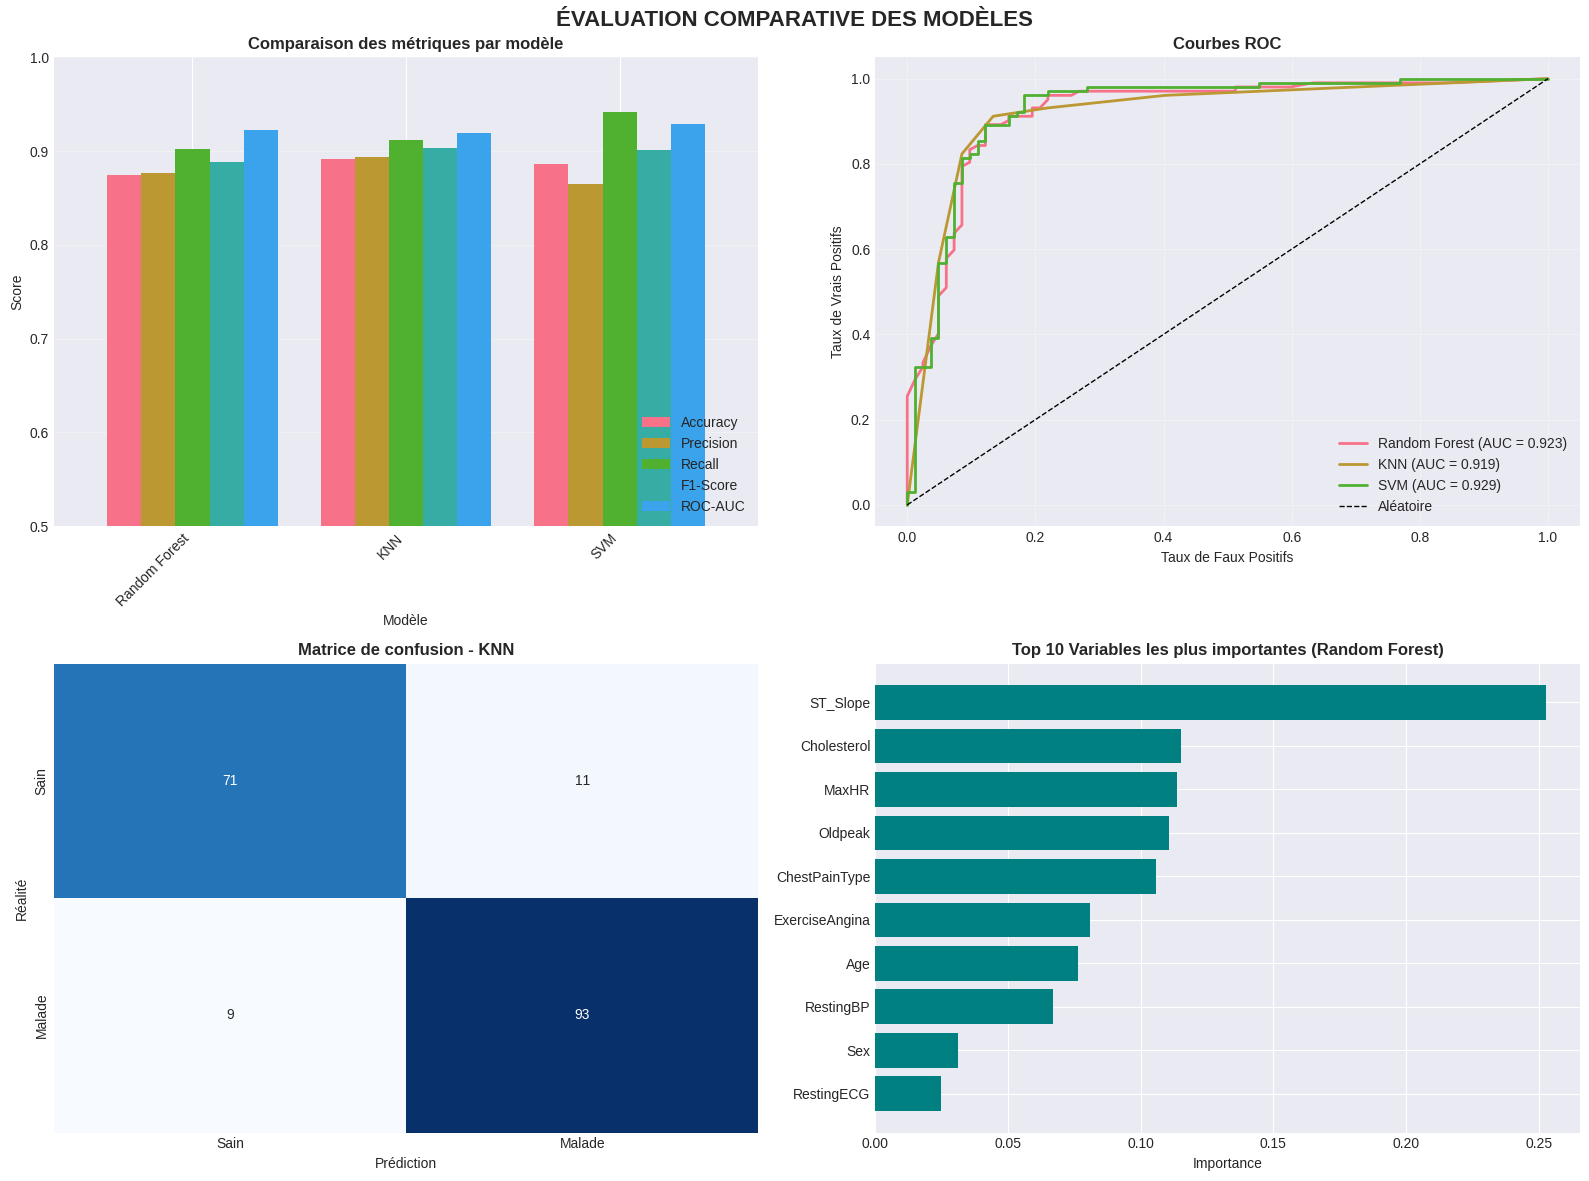

In [9]:
print("\n" + "=" * 80)
print("VISUALISATION DES RÉSULTATS")
print("=" * 80)

# Tableau comparatif des performances
results_df = pd.DataFrame(results).T
print("\n--- TABLEAU COMPARATIF DES PERFORMANCES ---")
print(results_df.to_string())

# Graphique de comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ÉVALUATION COMPARATIVE DES MODÈLES', fontsize=16, fontweight='bold')

# 1. Comparaison des métriques
ax = axes[0, 0]
results_df.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Comparaison des métriques par modèle', fontweight='bold')
ax.set_xlabel('Modèle')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.set_xticklabels(results_df.index, rotation=45, ha='right')
ax.set_ylim([0.5, 1.0])
ax.grid(axis='y', alpha=0.3)

# 2. Courbes ROC
ax = axes[0, 1]
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, predictions[name]['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

ax.plot([0, 1], [0, 1], 'k--', label='Aléatoire', linewidth=1)
ax.set_xlabel('Taux de Faux Positifs')
ax.set_ylabel('Taux de Vrais Positifs')
ax.set_title('Courbes ROC', fontweight='bold')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

# 3. Matrices de confusion pour Random Forest
best_model_name = results_df['F1-Score'].idxmax()
y_pred_best = predictions[best_model_name]['y_pred']

ax = axes[1, 0]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title(f'Matrice de confusion - {best_model_name}', fontweight='bold')
ax.set_xlabel('Prédiction')
ax.set_ylabel('Réalité')
ax.set_xticklabels(['Sain', 'Malade'])
ax.set_yticklabels(['Sain', 'Malade'])

# 4. Feature Importance (Random Forest)
ax = axes[1, 1]
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(importances)[::-1][:10]

    ax.barh(range(len(indices)), importances[indices], color='teal')
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels([feature_names[i] for i in indices])
    ax.set_xlabel('Importance')
    ax.set_title('Top 10 Variables les plus importantes (Random Forest)', fontweight='bold')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

# 7. OPTIMISATION DU MEILLEUR MODÈLE (Random Forest)

In [10]:
print("\n" + "=" * 80)
print("OPTIMISATION DU MEILLEUR MODÈLE")
print("=" * 80)

print(f"\nModèle sélectionné : {best_model_name}")

if best_model_name == 'Random Forest':
    print("\n--- GridSearch pour Random Forest ---")

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"\nMeilleurs paramètres : {grid_search.best_params_}")
    print(f"Meilleur score F1 (CV) : {grid_search.best_score_:.4f}")

    # Évaluation du modèle optimisé
    best_model = grid_search.best_estimator_
    y_pred_optimized = best_model.predict(X_test_scaled)

    print("\n--- Performance du modèle optimisé ---")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred_optimized):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred_optimized):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred_optimized):.4f}")
    print(f"F1-Score  : {f1_score(y_test, y_pred_optimized):.4f}")

    print("\n--- Rapport de classification ---")
    print(classification_report(y_test, y_pred_optimized,
                                target_names=['Sain', 'Malade']))


OPTIMISATION DU MEILLEUR MODÈLE

Modèle sélectionné : KNN


# 8. CONCLUSION

In [11]:
print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)

print(f"""
Le modèle {best_model_name} offre les meilleures performances avec :
- F1-Score : {results[best_model_name]['F1-Score']:.4f}
- ROC-AUC : {results[best_model_name]['ROC-AUC']:.4f}

Variables les plus importantes :
""")

if 'Random Forest' in models:
    rf_model = models['Random Forest']
    importances = rf_model.feature_importances_
    feature_names = X.columns
    indices = np.argsort(importances)[::-1][:5]

    for i, idx in enumerate(indices, 1):
        print(f"{i}. {feature_names[idx]}: {importances[idx]:.4f}")

print("""
Ce modèle peut être utilisé comme outil d'aide au dépistage précoce
des maladies cardiovasculaires dans un contexte clinique.
""")

print("=" * 80)
print("FIN DU PROJET")
print("=" * 80)


CONCLUSION

Le modèle KNN offre les meilleures performances avec :
- F1-Score : 0.9029
- ROC-AUC : 0.9192

Variables les plus importantes :

1. ST_Slope: 0.2528
2. Cholesterol: 0.1153
3. MaxHR: 0.1138
4. Oldpeak: 0.1106
5. ChestPainType: 0.1058

Ce modèle peut être utilisé comme outil d'aide au dépistage précoce
des maladies cardiovasculaires dans un contexte clinique.

FIN DU PROJET
